In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report


In [114]:
data = pd.read_csv("D:/projtest2023/mq5/buytype_H1.csv")
data.head()

,Unnamed: 0,index,time,open,high,low,close,spread,real_volume,ATR14,...,open-Previous4,high-Previous4,low-Previous4,close-Previous4,time5MeanClose,time5MAX,time5MIN,Stoploss,Stopprofit,Type
0,0,0,2015-11-17 07:00:00,6.39601,6.39746,6.39532,6.39635,44,325000000,NaN,...,NaN,NaN,NaN,NaN,NaN,6.39635,6.39635,NaN,NaN,NaN
1,1,1,2015-11-17 08:00:00,6.39645,6.39865,6.39576,6.39771,48,1103600000,NaN,...,NaN,NaN,NaN,NaN,NaN,6.39771,6.39635,NaN,NaN,NaN
2,2,2,2015-11-17 09:00:00,6.39771,6.40086,6.39771,6.39949,30,1506100000,NaN,...,NaN,NaN,NaN,NaN,NaN,6.39949,6.39635,NaN,NaN,NaN
3,3,3,2015-11-17 10:00:00,6.39949,6.40319,6.39929,6.40309,23,1458800000,NaN,...,NaN,NaN,NaN,NaN,NaN,6.40309,6.39635,NaN,NaN,NaN
4,4,4,2015-11-17 11:00:00,6.40309,6.40309,6.40030,6.40063,27,933800000,NaN,...,6.39601,6.39746,6.39532,6.39635,6.399454,6.40309,6.39635,NaN,NaN,NaN


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47124 entries, 0 to 47123
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  47124 non-null  int64  
 1   index                       47124 non-null  int64  
 2   time                        47124 non-null  object 
 3   open                        47124 non-null  float64
 4   high                        47124 non-null  float64
 5   low                         47124 non-null  float64
 6   close                       47124 non-null  float64
 7   spread                      47124 non-null  int64  
 8   real_volume                 47124 non-null  int64  
 9   ATR14                       47110 non-null  float64
 10  ATR20                       47104 non-null  float64
 11  SMA5                        47120 non-null  float64
 12  SMA10                       47115 non-null  float64
 13  SMA20                       471

In [116]:
data = data.drop(['Unnamed: 0', 'index', 'time'], axis=1, inplace=False)
data = data.dropna(axis=0)
data.head()

,open,high,low,close,spread,real_volume,ATR14,ATR20,SMA5,SMA10,...,open-Previous4,high-Previous4,low-Previous4,close-Previous4,time5MeanClose,time5MAX,time5MIN,Stoploss,Stopprofit,Type
33,6.41607,6.41607,6.41241,6.41293,34,990708000,0.003808,0.003624,6.414446,6.414244,...,6.41722,6.41742,6.41227,6.41367,6.414446,6.41601,6.41293,6.414258,6.417882,0.0
34,6.41266,6.41389,6.41102,6.41339,38,427388000,0.003741,0.003586,6.414390,6.414371,...,6.41328,6.41638,6.41328,6.41531,6.414390,6.41601,6.41293,6.412097,6.415683,1.0
35,6.41349,6.41778,6.41339,6.41769,47,711312000,0.003788,0.003626,6.414866,6.415167,...,6.41549,6.41569,6.41406,6.41431,6.414866,6.41769,6.41293,6.415967,6.419593,1.0
36,6.41773,6.41805,6.41690,6.41731,58,166200000,0.003599,0.003503,6.415466,6.415617,...,6.41421,6.41739,6.41421,6.41601,6.415466,6.41769,6.41293,6.416299,6.419801,0.0
37,6.41722,6.41937,6.41716,6.41859,76,137296000,0.003500,0.003438,6.415982,6.415643,...,6.41607,6.41607,6.41241,6.41293,6.415982,6.41859,6.41293,6.417651,6.421089,0.0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47087 entries, 33 to 47119
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   open                        47087 non-null  float64
 1   high                        47087 non-null  float64
 2   low                         47087 non-null  float64
 3   close                       47087 non-null  float64
 4   spread                      47087 non-null  int64  
 5   real_volume                 47087 non-null  int64  
 6   ATR14                       47087 non-null  float64
 7   ATR20                       47087 non-null  float64
 8   SMA5                        47087 non-null  float64
 9   SMA10                       47087 non-null  float64
 10  SMA20                       47087 non-null  float64
 11  EMA5                        47087 non-null  float64
 12  EMA10                       47087 non-null  float64
 13  EMA20                       47087 n

In [118]:
data.describe()

,open,high,low,close,spread,real_volume,ATR14,ATR20,SMA5,SMA10,...,open-Previous4,high-Previous4,low-Previous4,close-Previous4,time5MeanClose,time5MAX,time5MIN,Stoploss,Stopprofit,Type
count,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,4.708700e+04,47087.000000,47087.000000,47087.000000,47087.000000,...,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000,47087.000000
mean,6.739223,6.742075,6.736373,6.739257,141.344554,6.663635e+07,0.005769,0.005769,6.739219,6.739173,...,6.739148,6.742000,6.736298,6.739182,6.739219,6.743224,6.735201,6.739191,6.744959,0.493639
std,0.254873,0.255360,0.254400,0.254895,103.127278,1.966688e+08,0.002636,0.002549,0.254846,0.254793,...,0.254839,0.255326,0.254366,0.254860,0.254846,0.255553,0.254168,0.254873,0.255853,0.499965
min,6.240280,6.250350,6.235200,6.240240,0.000000,0.000000e+00,0.001788,0.001981,6.248230,6.248815,...,6.240280,6.250350,6.235200,6.240240,6.248230,6.251900,6.240240,6.246661,6.254039,0.000000
25%,6.510600,6.513540,6.507445,6.510435,103.000000,0.000000e+00,0.003949,0.003986,6.510089,6.510057,...,6.510435,6.513520,6.507320,6.510345,6.510089,6.514585,6.506075,6.511027,6.516062,0.000000
50%,6.745660,6.748910,6.742960,6.745780,123.000000,0.000000e+00,0.005133,0.005153,6.745390,6.745849,...,6.745580,6.748840,6.742900,6.745700,6.745390,6.749720,6.741840,6.745840,6.751917,0.000000
75%,6.927705,6.930415,6.925125,6.927780,151.000000,0.000000e+00,0.006795,0.006799,6.927772,6.927828,...,6.927630,6.930310,6.925100,6.927720,6.927772,6.931490,6.924520,6.927866,6.932955,1.000000
max,7.364390,7.374090,7.357980,7.364390,3042.000000,8.623850e+09,0.024479,0.022706,7.360174,7.348350,...,7.364390,7.374090,7.357980,7.364390,7.360174,7.364390,7.357980,7.366583,7.381597,1.000000


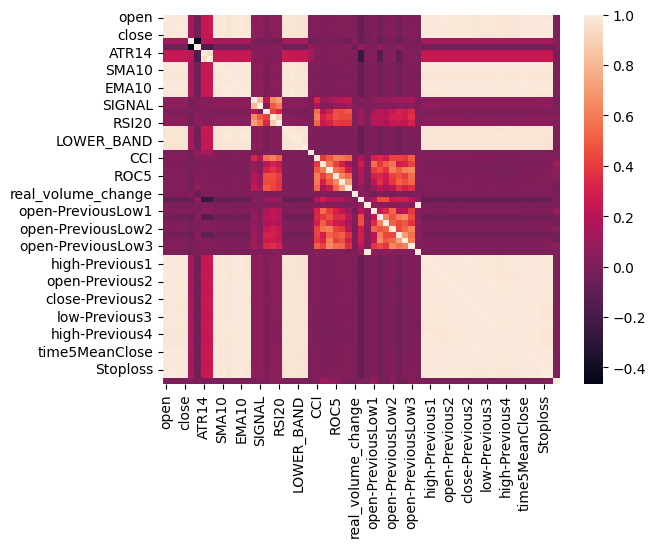

In [119]:
#绘制热度图：
corrdata = data.corr(method = 'kendall')
plot=sns.heatmap(corrdata)
 
plt.show()

In [120]:
#特征和标签
X = data.drop(columns = ['Type'])
Y = data['Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)

train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test)

In [121]:
params = {
    'task_type':'GPU',
    'iterations': 1000,
    'learning_rate': 0.02,
    'depth': 6,
    'early_stopping_rounds': 5,
}

model = CatBoostClassifier(**params)
model.fit(train_pool)

0:	learn: 0.6917702	total: 81.4ms	remaining: 1m 21s
1:	learn: 0.6904859	total: 160ms	remaining: 1m 19s
2:	learn: 0.6892692	total: 236ms	remaining: 1m 18s
3:	learn: 0.6881216	total: 310ms	remaining: 1m 17s
4:	learn: 0.6869523	total: 379ms	remaining: 1m 15s
5:	learn: 0.6857811	total: 447ms	remaining: 1m 14s
6:	learn: 0.6846299	total: 514ms	remaining: 1m 12s
7:	learn: 0.6835940	total: 583ms	remaining: 1m 12s
8:	learn: 0.6826202	total: 653ms	remaining: 1m 11s
9:	learn: 0.6816964	total: 721ms	remaining: 1m 11s
10:	learn: 0.6806986	total: 789ms	remaining: 1m 10s
11:	learn: 0.6798129	total: 858ms	remaining: 1m 10s
12:	learn: 0.6788823	total: 922ms	remaining: 1m 9s
13:	learn: 0.6780046	total: 988ms	remaining: 1m 9s
14:	learn: 0.6771599	total: 1.05s	remaining: 1m 9s
15:	learn: 0.6764340	total: 1.12s	remaining: 1m 9s
16:	learn: 0.6756701	total: 1.19s	remaining: 1m 8s
17:	learn: 0.6749372	total: 1.26s	remaining: 1m 8s
18:	learn: 0.6742026	total: 1.33s	remaining: 1m 8s
19:	learn: 0.6734956	total: 

163:	learn: 0.6425160	total: 11s	remaining: 56.3s
164:	learn: 0.6424278	total: 11.1s	remaining: 56.2s
165:	learn: 0.6423252	total: 11.2s	remaining: 56.1s
166:	learn: 0.6422339	total: 11.2s	remaining: 56.1s
167:	learn: 0.6421599	total: 11.3s	remaining: 56s
168:	learn: 0.6420887	total: 11.4s	remaining: 55.9s
169:	learn: 0.6420012	total: 11.4s	remaining: 55.8s
170:	learn: 0.6419409	total: 11.5s	remaining: 55.7s
171:	learn: 0.6418467	total: 11.6s	remaining: 55.6s
172:	learn: 0.6417652	total: 11.6s	remaining: 55.6s
173:	learn: 0.6416807	total: 11.7s	remaining: 55.5s
174:	learn: 0.6415782	total: 11.8s	remaining: 55.4s
175:	learn: 0.6414892	total: 11.8s	remaining: 55.4s
176:	learn: 0.6414322	total: 11.9s	remaining: 55.3s
177:	learn: 0.6413416	total: 12s	remaining: 55.2s
178:	learn: 0.6412628	total: 12s	remaining: 55.1s
179:	learn: 0.6411711	total: 12.1s	remaining: 55.1s
180:	learn: 0.6410738	total: 12.2s	remaining: 55s
181:	learn: 0.6409917	total: 12.2s	remaining: 54.9s
182:	learn: 0.6409084	

322:	learn: 0.6318546	total: 21.6s	remaining: 45.2s
323:	learn: 0.6318000	total: 21.6s	remaining: 45.1s
324:	learn: 0.6317513	total: 21.7s	remaining: 45s
325:	learn: 0.6316956	total: 21.8s	remaining: 45s
326:	learn: 0.6316668	total: 21.8s	remaining: 44.9s
327:	learn: 0.6316272	total: 21.9s	remaining: 44.8s
328:	learn: 0.6315603	total: 21.9s	remaining: 44.8s
329:	learn: 0.6314954	total: 22s	remaining: 44.7s
330:	learn: 0.6314240	total: 22.1s	remaining: 44.6s
331:	learn: 0.6313346	total: 22.2s	remaining: 44.6s
332:	learn: 0.6312865	total: 22.2s	remaining: 44.5s
333:	learn: 0.6312174	total: 22.3s	remaining: 44.4s
334:	learn: 0.6311744	total: 22.4s	remaining: 44.4s
335:	learn: 0.6311197	total: 22.4s	remaining: 44.3s
336:	learn: 0.6310617	total: 22.5s	remaining: 44.3s
337:	learn: 0.6310327	total: 22.6s	remaining: 44.2s
338:	learn: 0.6309734	total: 22.6s	remaining: 44.1s
339:	learn: 0.6309368	total: 22.7s	remaining: 44s
340:	learn: 0.6308863	total: 22.8s	remaining: 44s
341:	learn: 0.6308499	

484:	learn: 0.6241483	total: 32.2s	remaining: 34.1s
485:	learn: 0.6241468	total: 32.2s	remaining: 34s
486:	learn: 0.6241034	total: 32.2s	remaining: 34s
487:	learn: 0.6240707	total: 32.3s	remaining: 33.9s
488:	learn: 0.6240088	total: 32.4s	remaining: 33.8s
489:	learn: 0.6239762	total: 32.4s	remaining: 33.8s
490:	learn: 0.6239257	total: 32.5s	remaining: 33.7s
491:	learn: 0.6238716	total: 32.6s	remaining: 33.6s
492:	learn: 0.6238273	total: 32.6s	remaining: 33.6s
493:	learn: 0.6237789	total: 32.7s	remaining: 33.5s
494:	learn: 0.6237087	total: 32.8s	remaining: 33.4s
495:	learn: 0.6236808	total: 32.8s	remaining: 33.4s
496:	learn: 0.6236410	total: 32.9s	remaining: 33.3s
497:	learn: 0.6236041	total: 33s	remaining: 33.2s
498:	learn: 0.6235346	total: 33s	remaining: 33.2s
499:	learn: 0.6234880	total: 33.1s	remaining: 33.1s
500:	learn: 0.6234322	total: 33.2s	remaining: 33s
501:	learn: 0.6233890	total: 33.2s	remaining: 33s
502:	learn: 0.6233403	total: 33.3s	remaining: 32.9s
503:	learn: 0.6233089	to

646:	learn: 0.6174577	total: 42.5s	remaining: 23.2s
647:	learn: 0.6173762	total: 42.5s	remaining: 23.1s
648:	learn: 0.6173759	total: 42.5s	remaining: 23s
649:	learn: 0.6173340	total: 42.6s	remaining: 22.9s
650:	learn: 0.6172877	total: 42.7s	remaining: 22.9s
651:	learn: 0.6172018	total: 42.8s	remaining: 22.8s
652:	learn: 0.6171799	total: 42.8s	remaining: 22.8s
653:	learn: 0.6171549	total: 42.9s	remaining: 22.7s
654:	learn: 0.6171117	total: 42.9s	remaining: 22.6s
655:	learn: 0.6170470	total: 43s	remaining: 22.6s
656:	learn: 0.6169971	total: 43.1s	remaining: 22.5s
657:	learn: 0.6169535	total: 43.2s	remaining: 22.4s
658:	learn: 0.6168727	total: 43.2s	remaining: 22.4s
659:	learn: 0.6168208	total: 43.3s	remaining: 22.3s
660:	learn: 0.6167626	total: 43.3s	remaining: 22.2s
661:	learn: 0.6167243	total: 43.4s	remaining: 22.2s
662:	learn: 0.6166970	total: 43.5s	remaining: 22.1s
663:	learn: 0.6166546	total: 43.5s	remaining: 22s
664:	learn: 0.6165959	total: 43.6s	remaining: 22s
665:	learn: 0.616539

807:	learn: 0.6115851	total: 52.5s	remaining: 12.5s
808:	learn: 0.6115849	total: 52.6s	remaining: 12.4s
809:	learn: 0.6115607	total: 52.6s	remaining: 12.3s
810:	learn: 0.6115318	total: 52.7s	remaining: 12.3s
811:	learn: 0.6114929	total: 52.8s	remaining: 12.2s
812:	learn: 0.6114649	total: 52.8s	remaining: 12.2s
813:	learn: 0.6114411	total: 52.9s	remaining: 12.1s
814:	learn: 0.6114019	total: 53s	remaining: 12s
815:	learn: 0.6114017	total: 53s	remaining: 11.9s
816:	learn: 0.6113769	total: 53s	remaining: 11.9s
817:	learn: 0.6113318	total: 53.1s	remaining: 11.8s
818:	learn: 0.6112925	total: 53.2s	remaining: 11.8s
819:	learn: 0.6112635	total: 53.2s	remaining: 11.7s
820:	learn: 0.6112633	total: 53.3s	remaining: 11.6s
821:	learn: 0.6111980	total: 53.3s	remaining: 11.5s
822:	learn: 0.6111758	total: 53.4s	remaining: 11.5s
823:	learn: 0.6111458	total: 53.5s	remaining: 11.4s
824:	learn: 0.6111097	total: 53.5s	remaining: 11.4s
825:	learn: 0.6110785	total: 53.6s	remaining: 11.3s
826:	learn: 0.611035

968:	learn: 0.6063484	total: 1m 2s	remaining: 1.99s
969:	learn: 0.6062975	total: 1m 2s	remaining: 1.92s
970:	learn: 0.6062628	total: 1m 2s	remaining: 1.86s
971:	learn: 0.6062311	total: 1m 2s	remaining: 1.8s
972:	learn: 0.6062309	total: 1m 2s	remaining: 1.73s
973:	learn: 0.6061957	total: 1m 2s	remaining: 1.67s
974:	learn: 0.6061755	total: 1m 2s	remaining: 1.6s
975:	learn: 0.6061752	total: 1m 2s	remaining: 1.54s
976:	learn: 0.6061334	total: 1m 2s	remaining: 1.47s
977:	learn: 0.6060945	total: 1m 2s	remaining: 1.41s
978:	learn: 0.6060689	total: 1m 2s	remaining: 1.35s
979:	learn: 0.6060193	total: 1m 2s	remaining: 1.28s
980:	learn: 0.6059676	total: 1m 2s	remaining: 1.22s
981:	learn: 0.6059676	total: 1m 2s	remaining: 1.15s
982:	learn: 0.6059531	total: 1m 2s	remaining: 1.09s
983:	learn: 0.6058987	total: 1m 3s	remaining: 1.02s
984:	learn: 0.6058737	total: 1m 3s	remaining: 961ms
985:	learn: 0.6058736	total: 1m 3s	remaining: 897ms
986:	learn: 0.6058732	total: 1m 3s	remaining: 832ms
987:	learn: 0.

In [122]:
#test
y_pred = model.predict(test_pool)

In [123]:
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix

array([[2651, 2157],
       [1416, 3194]], dtype=int64)

In [58]:
# #混淆矩阵9418
# cmatrix = confusion_matrix(Y_test, y_pred)
# cmatrix

array([[2893, 1915],
       [1443, 3167]], dtype=int64)

In [124]:
#test
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)


Accuracy: 0.620620089190911 f1: 0.6413010741893385 recall: 0.6928416485900217 precision: 0.5968977761166138


In [125]:
feature_importance = model.get_feature_importance()
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance}")

open: 0.07426074644885491
high: 0.44584275399826956
low: 0.28888995756655805
close: 0.1928456161973502
spread: 8.122797384703212
real_volume: 1.7291286568950335
ATR14: 3.135918957967306
ATR20: 4.404320000953002
SMA5: 0.08257298768514948
SMA10: 0.08749393696673485
SMA20: 0.39712227521396676
EMA5: 0.1390270938134766
EMA10: 0.1599314086354262
EMA20: 0.41071544641932617
MACD: 1.7250511617333735
SIGNAL: 1.3428302740050655
HIST: 2.061383480656104
RSI14: 1.4569979526498655
RSI20: 1.550998238648963
UPPER_BAND: 0.6167299294454749
MIDDLE_BAND: 0.36197780158896964
LOWER_BAND: 0.8266459167767882
SAR: 0.8091122668989502
ADX: 3.7501639755280896
CCI: 3.8884434481344194
ROC2: 18.63587369218358
ROC3: 4.209216161252635
ROC5: 0.7530122429800294
SLOWK: 1.3821150060477714
SLOWD: 1.9369191914011263
real_volume_change: 1.736519890380746
open-PreviousHigh1: 0.8034310997494897
open-PreviousClose1: 2.1036539727264523
open-PreviousLow1: 4.589034758066014
open-PreviousHigh2: 1.3596433978684366
open-PreviousClose2

In [ ]:
"""
########################
"""
# 创建数据集对象
train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test)
# 定义参数网格 'loss_function': 'Logloss', 'random_strength':[10,20,30],
params_grid = {
    ''n_estimators': [1000,2000],
    'learning_rate': [0.01, 0.02],
    'depth': [6, 12, 16],
    'l2_leaf_reg':[2,3],
    'bagging_temperature':[0.5,0.6]
}

# 设置其他固定参数
fixed_params = {
    'iterations': 2000,
    'early_stopping_rounds': 5,
    'task_type':'GPU',
}

# 执行网格搜索
model = CatBoostClassifier(**fixed_params)

# 定义交叉验证策略（此处使用5折交叉验证）
cv = KFold(n_splits=5, shuffle=True)

# 执行网格搜索交叉验证
grid_search = GridSearchCV(estimator=model, param_grid=params_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# 输出参数组合和对应的指标结果
print("grid_search_result: ")
print(grid_search_result)


In [ ]:
# test_pool = Pool(X_test)

# params = {
#     'iterations': 1000,
#     'learning_rate': 0.03,
#     'depth': 6,
#     'loss_function': 'Logloss',
#     'early_stopping_rounds': 5,
#     'eval_metric':'Accuracy'
# }
# # 创建 CatBoost 分类器
# model_pool = CatBoostClassifier(**params)
# model_pool.fit(train_pool)
# #test
# y_pred_pool = model_pool.predict(test_pool)

# y_pred_int = y_pred_pool.astype(int)
# accuracy = accuracy_score(Y_test, y_pred_int)
# f1 = f1_score(Y_test, y_pred_int)
# recall = recall_score(Y_test, y_pred_int)
# precision = precision_score(Y_test, y_pred_int)
# print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)

"n_estimators": 7000, 设置为7000，表示要训练的决策树数量。
'loss_function': 'Logloss',
'random_strength':[10,20,30],
"od_wait": 500, od_wait: 设置为500，在早停法中等待多少轮没有改善后停止训练。

In [ ]:
# 创建数据集对象
train_pool = Pool(X_train, Y_train)

# 定义参数网格 
params_grid = {
    'learning_rate': [0.02, 0.025],
    'depth': [6, 8, 10],
    'l2_leaf_reg':[2,3,4],
    'bagging_temperature':[0.5,0.6,0.7]
}

# 设置其他固定参数
fixed_params = {
    'iterations': 1000,
    'early_stopping_rounds': 5,
    'task_type':'GPU',
}

# 执行网格搜索
model = CatBoostClassifier(**fixed_params)
grid_search_result = model.grid_search(params_grid, train_pool)

# 输出最佳参数组合和对应的指标结果
print("grid_search_result: ")
print(grid_search_result)


In [137]:
feature_importance = model.get_feature_importance()
feature_dic ={}
for feature, importance in zip(X_train.columns, feature_importance):
    feature_dic[feature] = importance
sorted_feature_dic = dict(sorted(feature_dic.items(), key=lambda x: x[1],reverse=True))
for key,value in sorted_feature_dic.items():
    print(key,value)

ROC2 18.63587369218358
open-PreviousClose2 12.36839328073624
spread 8.122797384703212
open-PreviousLow1 4.589034758066014
ATR20 4.404320000953002
ROC3 4.209216161252635
CCI 3.8884434481344194
ADX 3.7501639755280896
ATR14 3.135918957967306
open-PreviousHigh3 2.3973001483764196
open-PreviousClose3 2.3598385712886145
open-PreviousClose1 2.1036539727264523
HIST 2.061383480656104
SLOWD 1.9369191914011263
real_volume_change 1.736519890380746
real_volume 1.7291286568950335
MACD 1.7250511617333735
RSI20 1.550998238648963
RSI14 1.4569979526498655
SLOWK 1.3821150060477714
open-PreviousHigh2 1.3596433978684366
open-PreviousClose1-change 1.355829622576596
SIGNAL 1.3428302740050655
open-PreviousLow2 0.9512836240176372
LOWER_BAND 0.8266459167767882
SAR 0.8091122668989502
open-PreviousHigh1 0.8034310997494897
ROC5 0.7530122429800294
open-PreviousLow3 0.7502294483824178
UPPER_BAND 0.6167299294454749
Stoploss 0.5774314150245036
Stopprofit 0.5255803382491819
high 0.44584275399826956
EMA20 0.410715446419

In [ ]:
[['ROC2', 'open-PreviousClose2', 'open-PreviousLow1', 'ATR20 ', 
  'ROC3', 'CCI', 'ADX', 'ATR14', 
  'open-PreviousHigh3', 'open-PreviousClose2', 'open-PreviousClose2', 'open-PreviousClose2', 
  'open-PreviousClose2', 'open-PreviousClose2', 'open-PreviousClose2', 'open-PreviousClose2', 
  'open-PreviousClose2', 'open-PreviousClose2', 'open-PreviousClose2', 'open-PreviousClose2']]